In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Heart Disease Prediction via a Decision Tree Classifier

In [2]:
data = pd.read_csv("Heart.csv")
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [3]:
# Data Cleaning + converting the data into numerical values
data = data.drop(columns=['Unnamed: 0'])
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
data['ChestPain'] = data['ChestPain'].astype('category')
data['ChestPain'] = data['ChestPain'].cat.codes

In [5]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [6]:
data = data.dropna()

In [7]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [8]:
data['Thal'] = data['Thal'].astype('category').cat.codes
data['AHD'] = data['AHD'].map({'No': 0, 'Yes': 1})

/var/folders/9d/4lzh95ns31578p84nyk1_4ph0000gn/T/ipykernel_12549/175510485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thal'] = data['Thal'].astype('category').cat.codes
/var/folders/9d/4lzh95ns31578p84nyk1_4ph0000gn/T/ipykernel_12549/175510485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AHD'] = data['AHD'].map({'No': 0, 'Yes': 1})


In [9]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    int8   
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    int8   
 13  AHD        297 non-null    int64  
dtypes: float64(2), int64(10), int8(2)
memory usage: 30.7 KB


In [11]:
import sklearn

In [29]:
# Implementing a Decision Tree Classifier using sklearn
from sklearn.model_selection import train_test_split
X = data.copy()
y = data['AHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)

In [31]:
# Function to train and visualize the decision tree
from sklearn.tree import plot_tree
def train_and_visualize_tree(X_train, y_train, X, max_depth=2, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0, random_state=42):
    #Training the decision tree classifier
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha,
        random_state=random_state
    )
    clf = clf.fit(X_train, y_train)
    
    plt.figure(figsize=(20, 10))
    plot_tree(
        clf,
        filled=True,
        feature_names=X.columns,
        class_names=clf.classes_.astype(str),
        rounded=True
    )
    plt.title(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, ccp_alpha={ccp_alpha})")
    plt.show()

# Visualizing the Decision Tree with different parameters

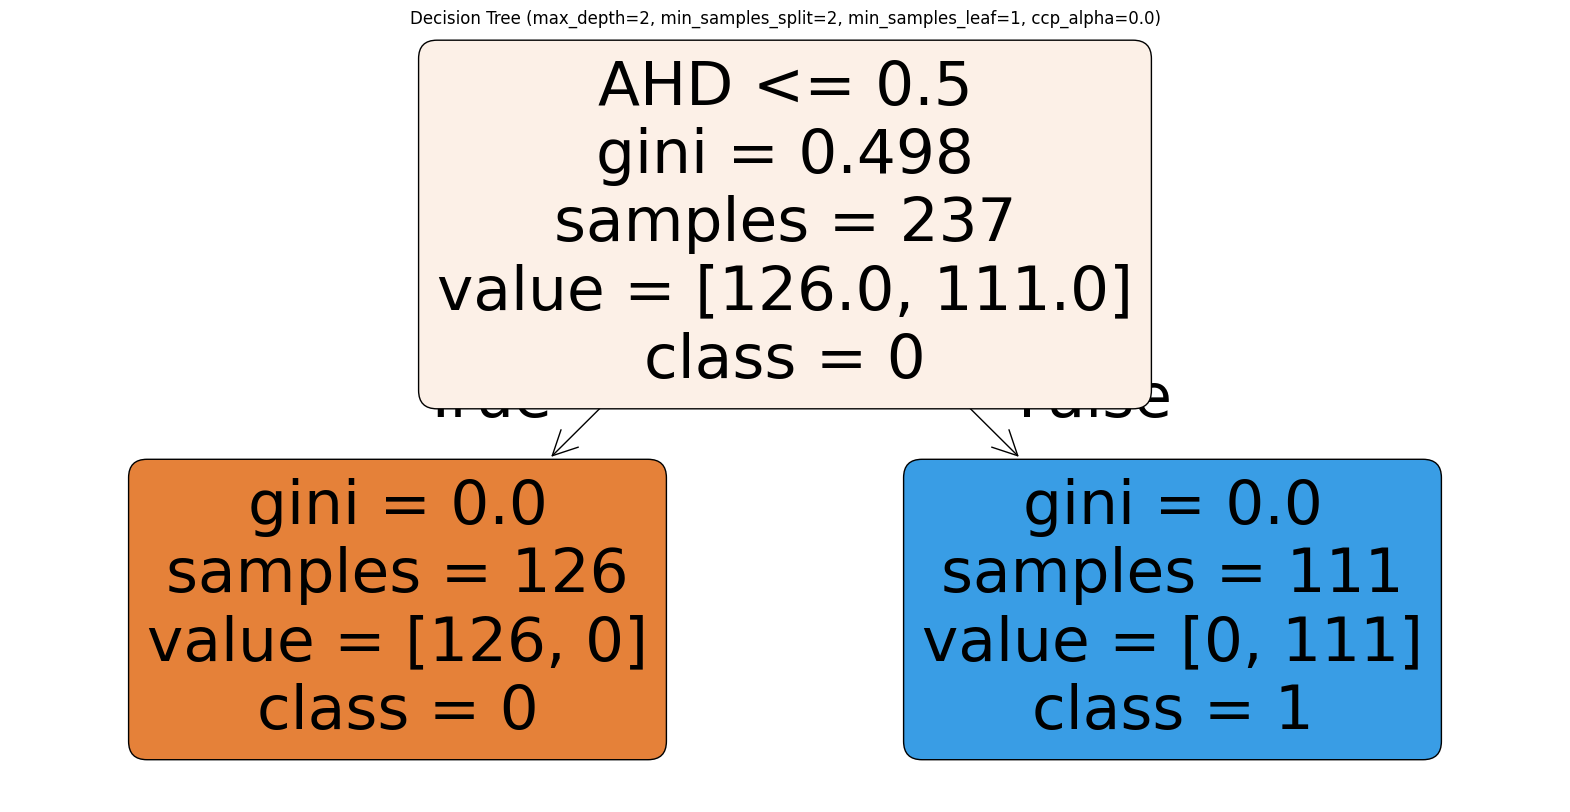

In [32]:
# Setting 1: Default parameters
train_and_visualize_tree(X_train, y_train, X)

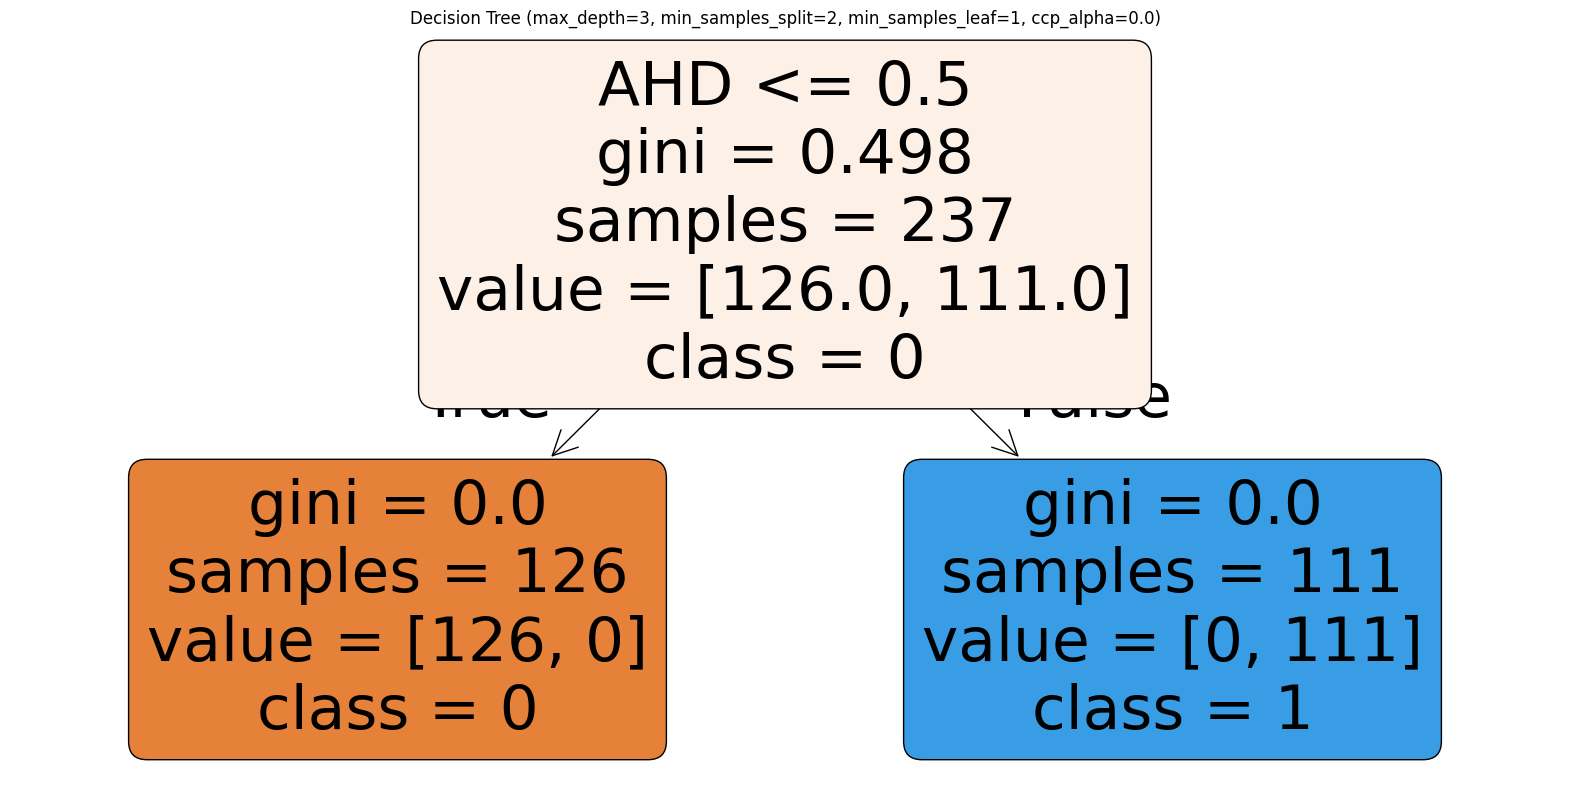

In [33]:
# Setting 2: Limited max_depth
train_and_visualize_tree(X_train, y_train, X, max_depth=3)

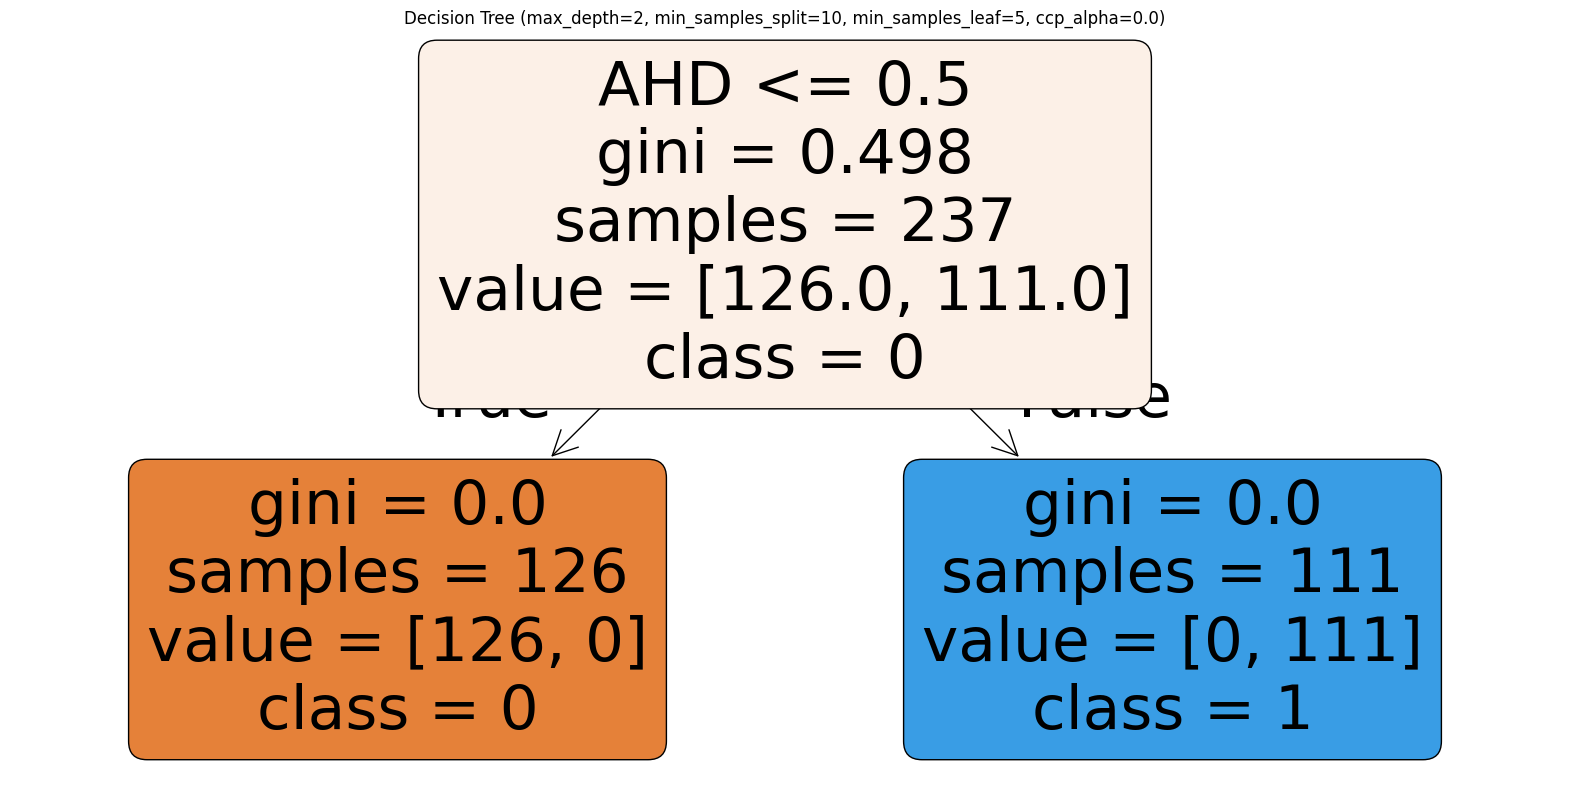

In [34]:
# Setting 3: Increased min_samples_split and min_samples_leaf
train_and_visualize_tree(X_train, y_train, X, min_samples_split=10, min_samples_leaf=5)

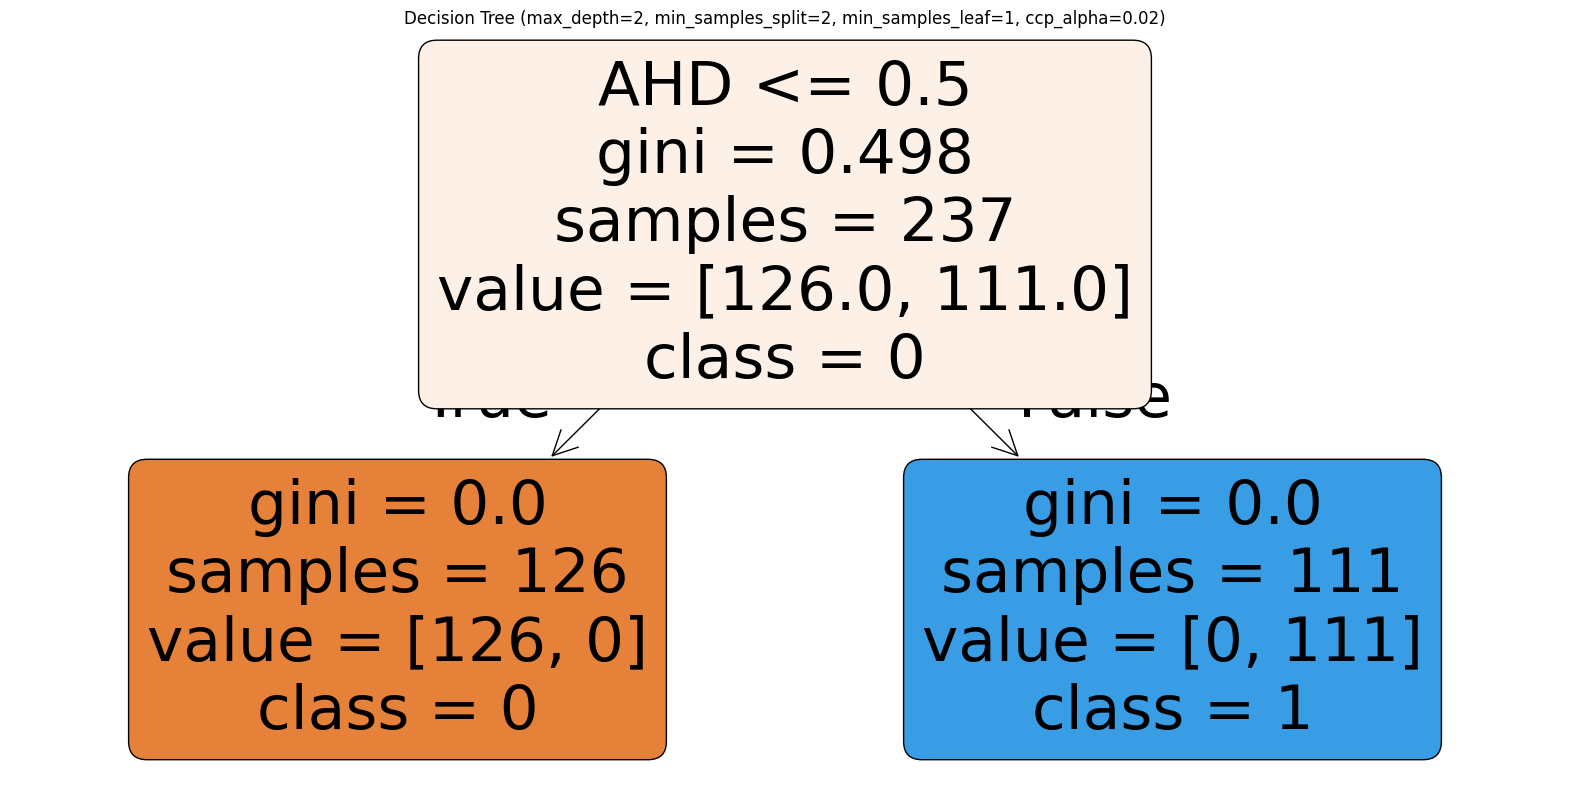

In [35]:
# Setting 4: Increased ccp_alpha for pruning
train_and_visualize_tree(X_train, y_train, X, ccp_alpha=0.02)

# Sensitivity Analysis
Sensitivity Analysis is a technique that determines how the output of a model is affected by the chnages in its input parameters.In Layman's terms, it allows us to see which variables have the greatest influence on the output.
You perform Sensitivity Analysis by selecting the features you want to analyze. Then you systematically change the values of the selected features while keeping other features constant. Next, you measure the impact of these changes on the model's predictions.Finally, you quantify the sensitivity of the model to changes on the input features. 
Sources:
https://en.wikipedia.org/wiki/Sensitivity_analysis
https://www.nature.com/articles/s41433-022-02108-0 this is cool because it is from a medical standpoint
https://pmc.ncbi.nlm.nih.gov/articles/PMC9605992/ this is medical as well
https://www.mrcctu.ucl.ac.uk/our-research/methodology/analysis/

it is interesting that the medical field has the most research on sensitivity analysis

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

X = data.drop('AHD', axis=1)
y = data['AHD']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_features = ['Age', 'MaxHR']       # must match exactly in X_train
categorical_features = ['Sex']           # rename or remove if you have no such col

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# 7. Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'MaxHR']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex'])])),
                ('clf', RandomForestClassifier(random_state=42))])

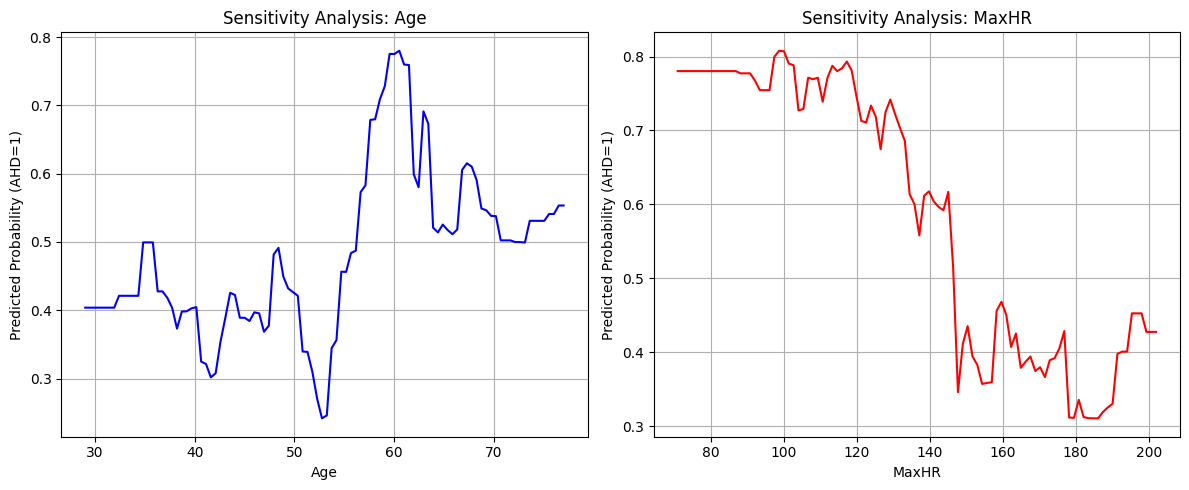

In [46]:
import numpy as np
# Function to perform sensitivity analysis
def sensitivity_analysis(pipeline, X, feature, values):
    predictions = []
    for val in values:
        # Copy original data to avoid overwriting
        X_temp = X.copy()
        
        X_temp[feature] = val      
        probs = pipeline.predict_proba(X_temp)[:, 1]
        
        # We collect the average predicted probability across all samples
        predictions.append(np.mean(probs))
    return predictions


age_values = np.linspace(X_train['Age'].min(), X_train['Age'].max(), 100)
maxhr_values = np.linspace(X_train['MaxHR'].min(), X_train['MaxHR'].max(), 100)

age_predictions = sensitivity_analysis(pipeline, X_train, 'Age', age_values)
maxhr_predictions = sensitivity_analysis(pipeline, X_train, 'MaxHR', maxhr_values)

age_sensitivity = np.std(age_predictions)
maxhr_sensitivity = np.std(maxhr_predictions)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(age_values, age_predictions, color='blue')
plt.title('Sensitivity Analysis: Age')
plt.xlabel('Age')
plt.ylabel('Predicted Probability (AHD=1)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(maxhr_values, maxhr_predictions, color='red')
plt.title('Sensitivity Analysis: MaxHR')
plt.xlabel('MaxHR')
plt.ylabel('Predicted Probability (AHD=1)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [47]:
# Sensitivity Analysis
age_sensitivity = np.std(age_predictions)
maxhr_sensitivity = np.std(maxhr_predictions)

print(f"Sensitivity of Age: {age_sensitivity:.4f}")
print(f"Sensitivity of MaxHR: {maxhr_sensitivity:.4f}")

Sensitivity of Age: 0.1200
Sensitivity of MaxHR: 0.1826


In [49]:
# Task 2
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score
from scipy.stats import ttest_rel

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,
    random_state=42
)

boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,
    random_state=42
)

def evaluate_model_with_cv(model, X, y, n_splits_list):
    from sklearn.metrics import precision_score, accuracy_score, f1_score
    
    results = {}
    for n_splits in n_splits_list:
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
        fold_accuracies = []
        fold_precisions = []
        fold_f1s = []
        
        for train_index, test_index in skf.split(X, y):
            X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
            y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
            
            # Fit the model on this fold
            model.fit(X_train_cv, y_train_cv)
            y_pred = model.predict(X_test_cv)
            
            fold_accuracies.append(accuracy_score(y_test_cv, y_pred))
            fold_precisions.append(precision_score(y_test_cv, y_pred, zero_division=0))
            fold_f1s.append(f1_score(y_test_cv, y_pred, zero_division=0))
        
        results[n_splits] = (fold_accuracies, fold_precisions, fold_f1s)
    
    return results

folds_to_try = [5, 10, 15]

bagging_results  = evaluate_model_with_cv(bagging_model,  X, y, folds_to_try)
boosting_results = evaluate_model_with_cv(boosting_model, X, y, folds_to_try)


def print_cv_results(name, results_dict):
    print(f"\n{name} CV Results:")
    for n_splits, (accs, precs, f1s) in results_dict.items():
        print(f"  Folds = {n_splits}")
        print(f"    Accuracy  = {np.mean(accs):.4f}  (std = {np.std(accs):.4f})")
        print(f"    Precision = {np.mean(precs):.4f}  (std = {np.std(precs):.4f})")
        print(f"    F1        = {np.mean(f1s):.4f}  (std = {np.std(f1s):.4f})")

print_cv_results("Bagging",  bagging_results)
print_cv_results("Boosting", boosting_results)


Bagging CV Results:
  Folds = 5
    Accuracy  = 0.7710  (std = 0.0368)
    Precision = 0.7854  (std = 0.0613)
    F1        = 0.7367  (std = 0.0461)
  Folds = 10
    Accuracy  = 0.7775  (std = 0.0758)
    Precision = 0.7792  (std = 0.1031)
    F1        = 0.7493  (std = 0.0981)
  Folds = 15
    Accuracy  = 0.8047  (std = 0.0773)
    Precision = 0.8240  (std = 0.1043)
    F1        = 0.7771  (std = 0.0904)

Boosting CV Results:
  Folds = 5
    Accuracy  = 0.8113  (std = 0.0611)
    Precision = 0.8084  (std = 0.0834)
    F1        = 0.7936  (std = 0.0628)
  Folds = 10
    Accuracy  = 0.8182  (std = 0.0642)
    Precision = 0.8420  (std = 0.1058)
    F1        = 0.7945  (std = 0.0692)
  Folds = 15
    Accuracy  = 0.8186  (std = 0.0694)
    Precision = 0.8287  (std = 0.0963)
    F1        = 0.7969  (std = 0.0795)


In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Confusion Matrix

# Single train-test split
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit bagging on this single split and show confusion matrix
bagging_model.fit(X_train_single, y_train_single)
y_pred_bag = bagging_model.predict(X_test_single)

cm_bag = confusion_matrix(y_test_single, y_pred_bag)
print("Confusion Matrix - Bagging (single 80/20 split):")
print(cm_bag)
print("Classification Report:")
print(classification_report(y_test_single, y_pred_bag))

# Fit boosting on the same single split
boosting_model.fit(X_train_single, y_train_single)
y_pred_boost = boosting_model.predict(X_test_single)

cm_boost = confusion_matrix(y_test_single, y_pred_boost)
print("Confusion Matrix - Boosting (single 80/20 split):")
print(cm_boost)
print("Classification Report:")
print(classification_report(y_test_single, y_pred_boost))


Confusion Matrix - Bagging (single 80/20 split):
[[27  5]
 [ 9 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.79      0.68      0.73        28

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60

Confusion Matrix - Boosting (single 80/20 split):
[[27  5]
 [ 4 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [51]:
# The statistical test
from scipy.stats import ttest_rel

# Extract the accuracies from 5-fold CV
bagging_5fold_acc  = bagging_results[5][0]   # (accs, precs, f1s) -> index 0 = acc list
boosting_5fold_acc = boosting_results[5][0]

# Paired t-test
t_stat, p_value = ttest_rel(bagging_5fold_acc, boosting_5fold_acc)
print("\nPaired t-test (Bagging vs. Boosting) on 5-fold Accuracy:")
print(f"  t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# If p-value < 0.05 (commonly), we say there's a statistically significant difference.

# as the p-values is less than 0.05 there is a statistically significant difference



Paired t-test (Bagging vs. Boosting) on 5-fold Accuracy:
  t-statistic = -3.2067, p-value = 0.0327


Training DecisionTreeClassifier with parameters:
  max_depth = None
  min_samples_split = 2
  min_samples_leaf = 1
  ccp_alpha = 0.0
  Tree Depth = 10
  Number of Leaves = 47



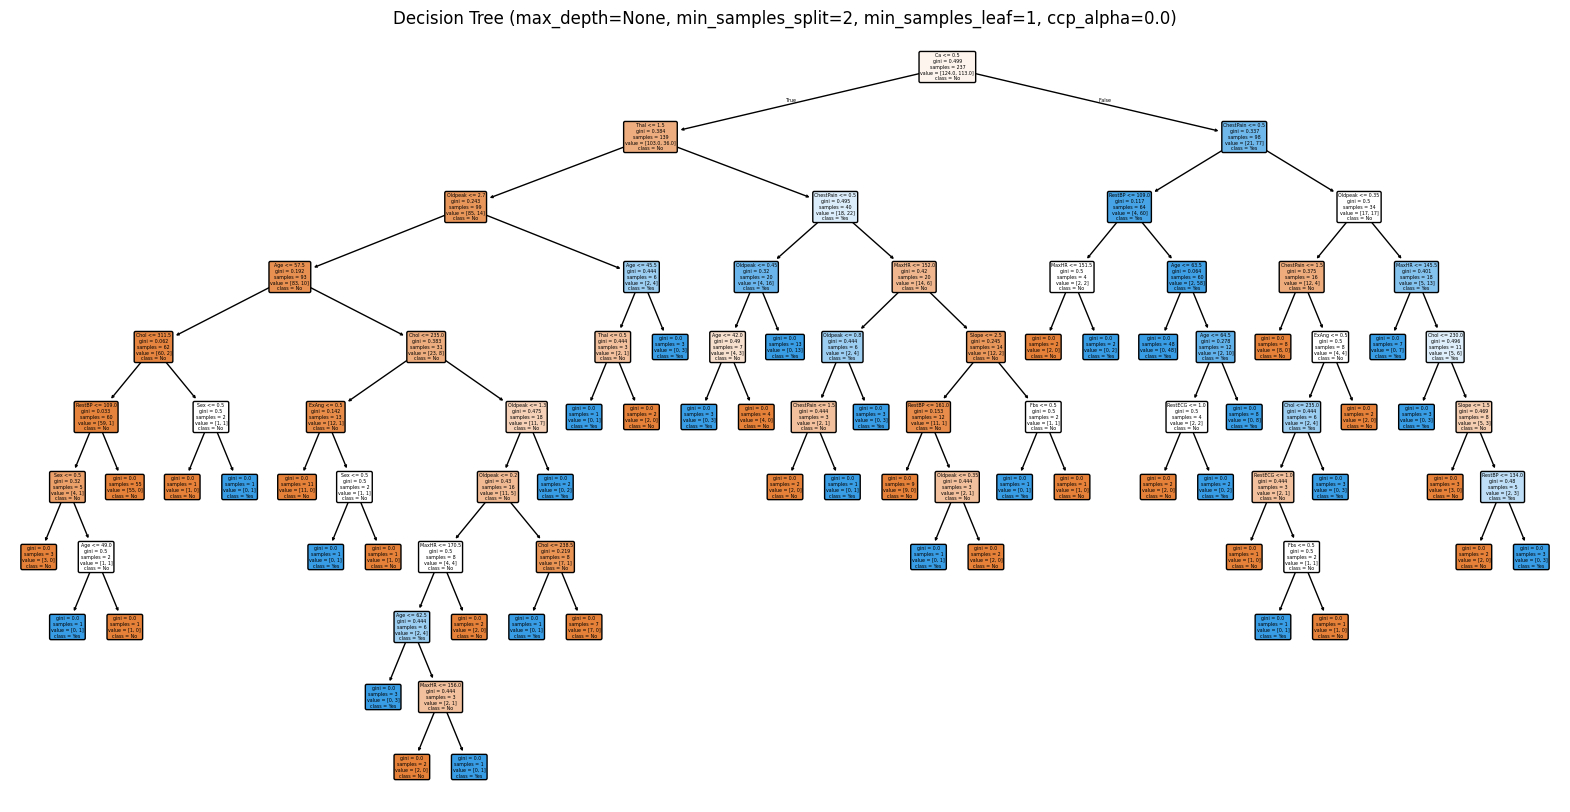

Tree Rules:
|--- Ca <= 0.50
|   |--- Thal <= 1.50
|   |   |--- Oldpeak <= 2.70
|   |   |   |--- Age <= 57.50
|   |   |   |   |--- Chol <= 311.50
|   |   |   |   |   |--- RestBP <= 109.00
|   |   |   |   |   |   |--- Sex <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Sex >  0.50
|   |   |   |   |   |   |   |--- Age <= 49.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  49.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- RestBP >  109.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Chol >  311.50
|   |   |   |   |   |--- Sex <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Sex >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  57.50
|   |   |   |   |--- Chol <= 235.00
|   |   |   |   |   |--- ExAng <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ExAng >  0.50
|   |   |   |   |   |   |--- Sex <= 0.50
|   |   |   |   

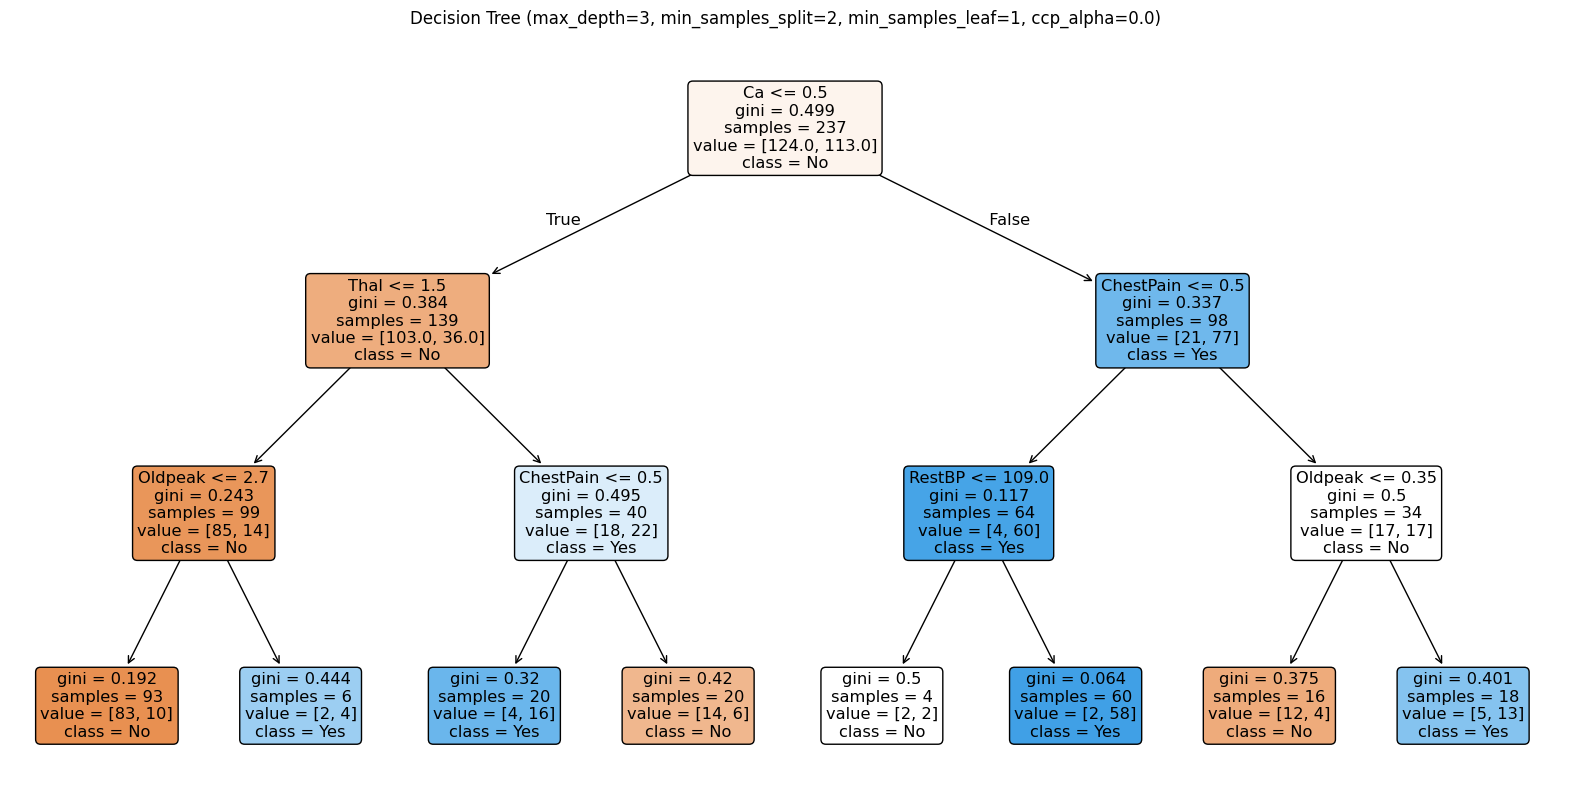

Tree Rules:
|--- Ca <= 0.50
|   |--- Thal <= 1.50
|   |   |--- Oldpeak <= 2.70
|   |   |   |--- class: 0
|   |   |--- Oldpeak >  2.70
|   |   |   |--- class: 1
|   |--- Thal >  1.50
|   |   |--- ChestPain <= 0.50
|   |   |   |--- class: 1
|   |   |--- ChestPain >  0.50
|   |   |   |--- class: 0
|--- Ca >  0.50
|   |--- ChestPain <= 0.50
|   |   |--- RestBP <= 109.00
|   |   |   |--- class: 0
|   |   |--- RestBP >  109.00
|   |   |   |--- class: 1
|   |--- ChestPain >  0.50
|   |   |--- Oldpeak <= 0.35
|   |   |   |--- class: 0
|   |   |--- Oldpeak >  0.35
|   |   |   |--- class: 1



Training DecisionTreeClassifier with parameters:
  max_depth = None
  min_samples_split = 10
  min_samples_leaf = 5
  ccp_alpha = 0.0
  Tree Depth = 7
  Number of Leaves = 23



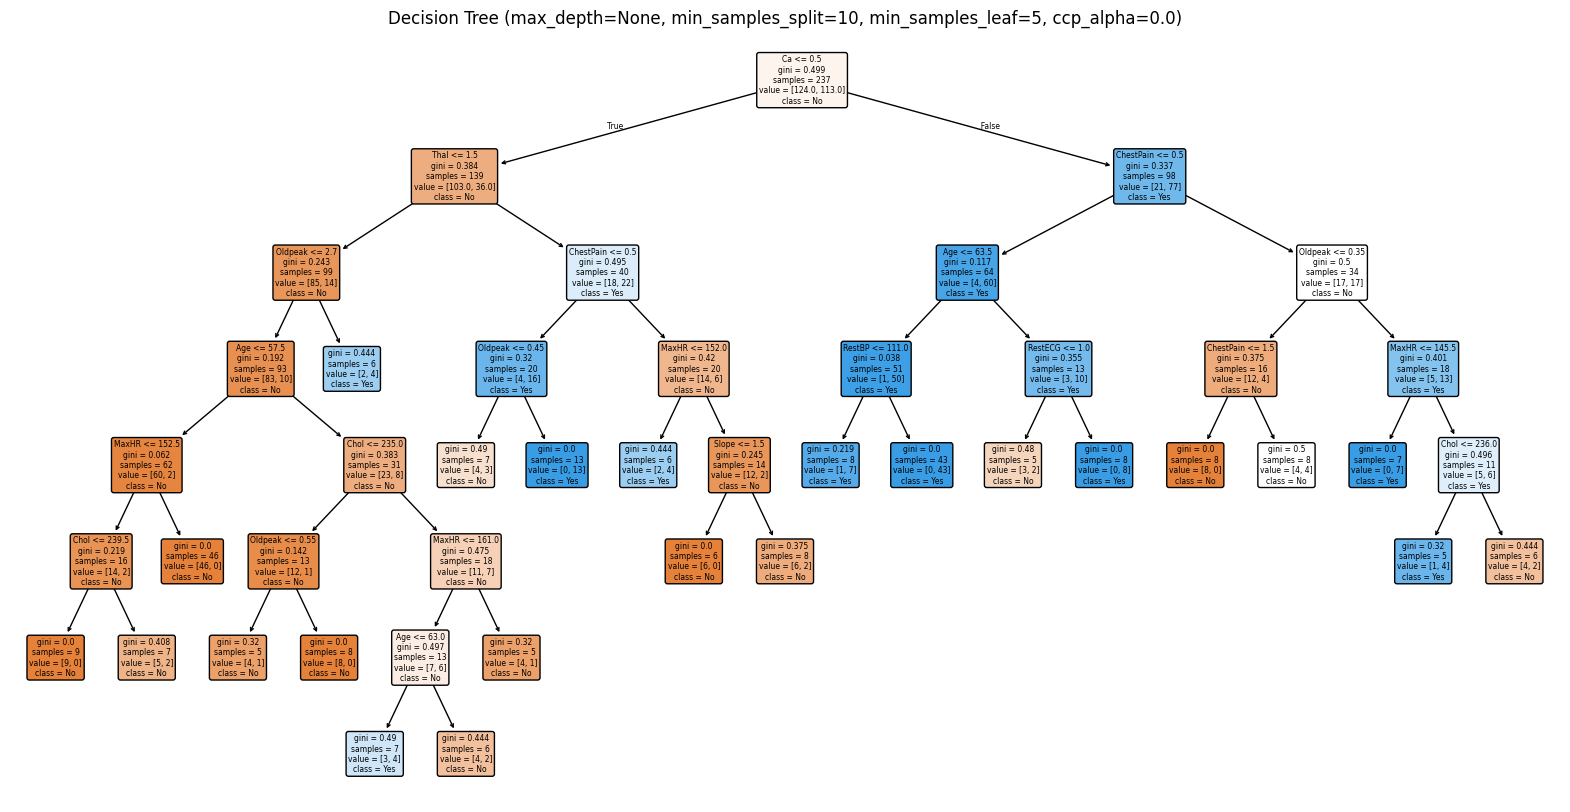

Tree Rules:
|--- Ca <= 0.50
|   |--- Thal <= 1.50
|   |   |--- Oldpeak <= 2.70
|   |   |   |--- Age <= 57.50
|   |   |   |   |--- MaxHR <= 152.50
|   |   |   |   |   |--- Chol <= 239.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Chol >  239.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- MaxHR >  152.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  57.50
|   |   |   |   |--- Chol <= 235.00
|   |   |   |   |   |--- Oldpeak <= 0.55
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Oldpeak >  0.55
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Chol >  235.00
|   |   |   |   |   |--- MaxHR <= 161.00
|   |   |   |   |   |   |--- Age <= 63.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  63.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MaxHR >  161.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- Oldpeak >  2.70
|   |   |   |--- class: 1
|   |--- Thal >  1.50
| 

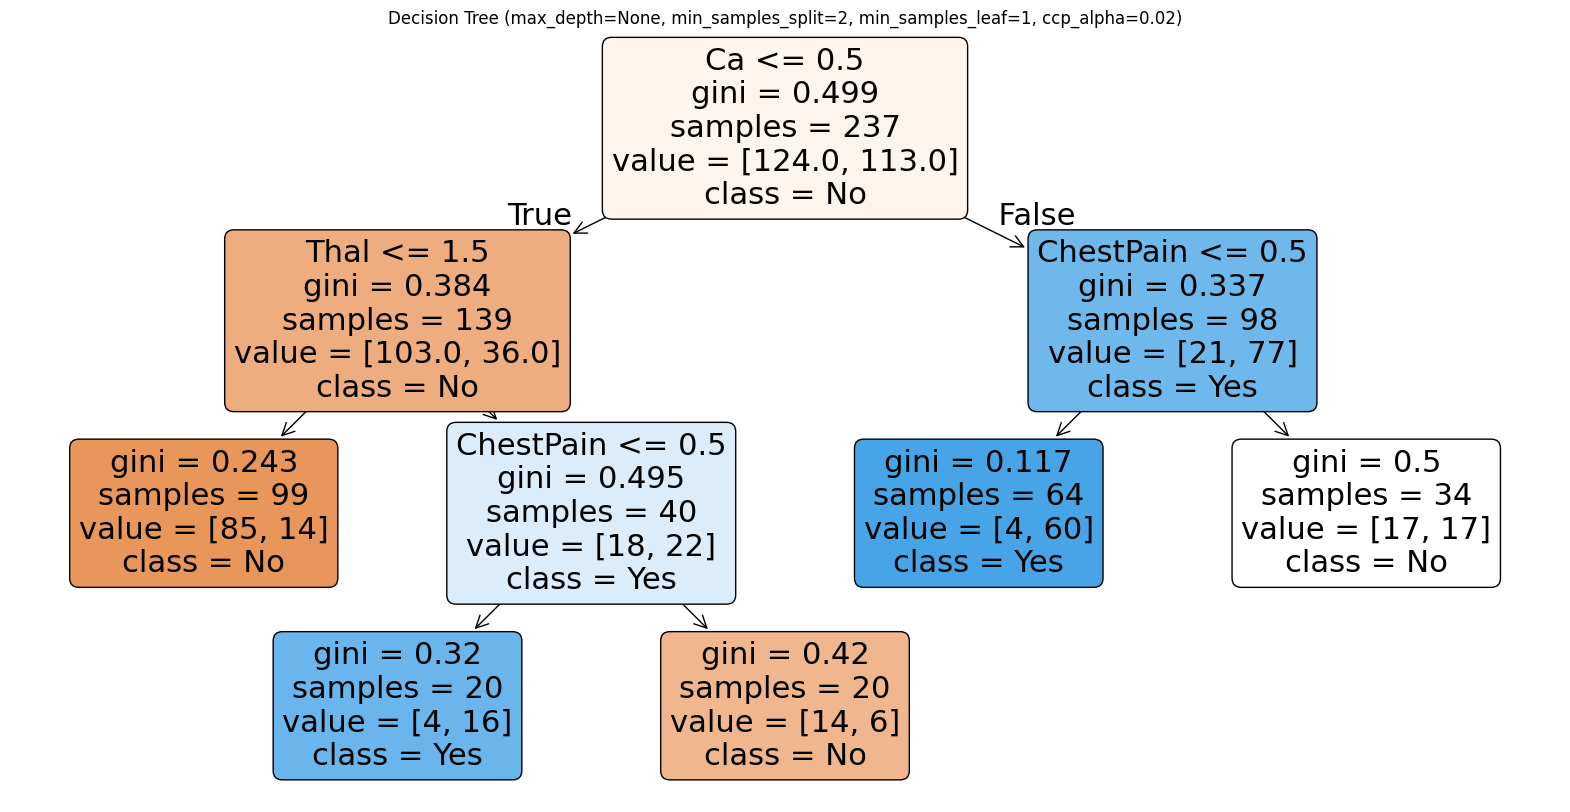

Tree Rules:
|--- Ca <= 0.50
|   |--- Thal <= 1.50
|   |   |--- class: 0
|   |--- Thal >  1.50
|   |   |--- ChestPain <= 0.50
|   |   |   |--- class: 1
|   |   |--- ChestPain >  0.50
|   |   |   |--- class: 0
|--- Ca >  0.50
|   |--- ChestPain <= 0.50
|   |   |--- class: 1
|   |--- ChestPain >  0.50
|   |   |--- class: 0



Training DecisionTreeClassifier with parameters:
  max_depth = 1
  min_samples_split = 2
  min_samples_leaf = 1
  ccp_alpha = 0.0
  Tree Depth = 1
  Number of Leaves = 2



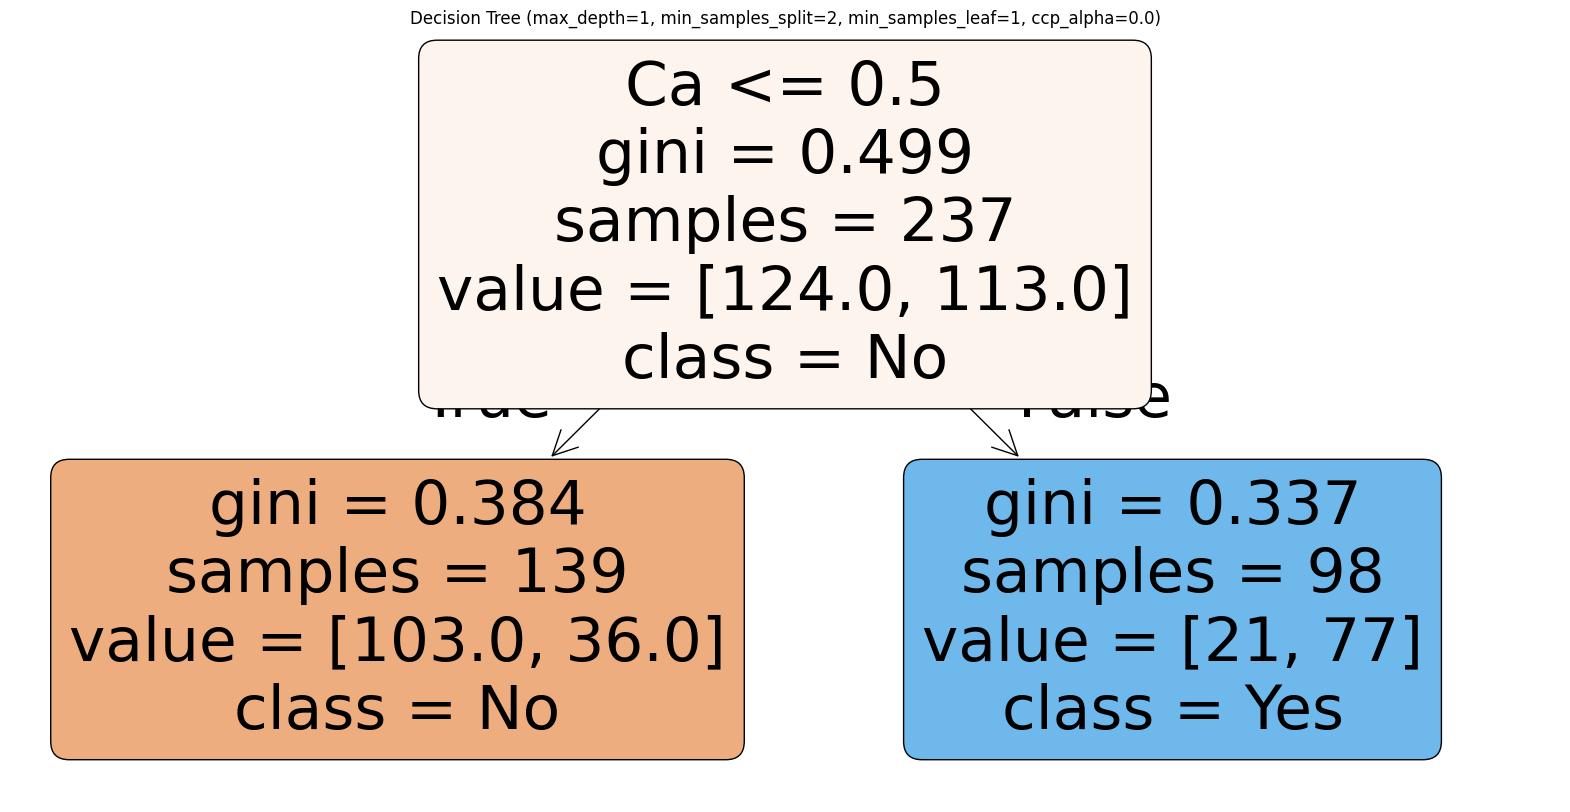

Tree Rules:
|--- Ca <= 0.50
|   |--- class: 0
|--- Ca >  0.50
|   |--- class: 1



Training DecisionTreeClassifier with parameters:
  max_depth = None
  min_samples_split = 2
  min_samples_leaf = 1
  ccp_alpha = 0.0
  Tree Depth = 10
  Number of Leaves = 47



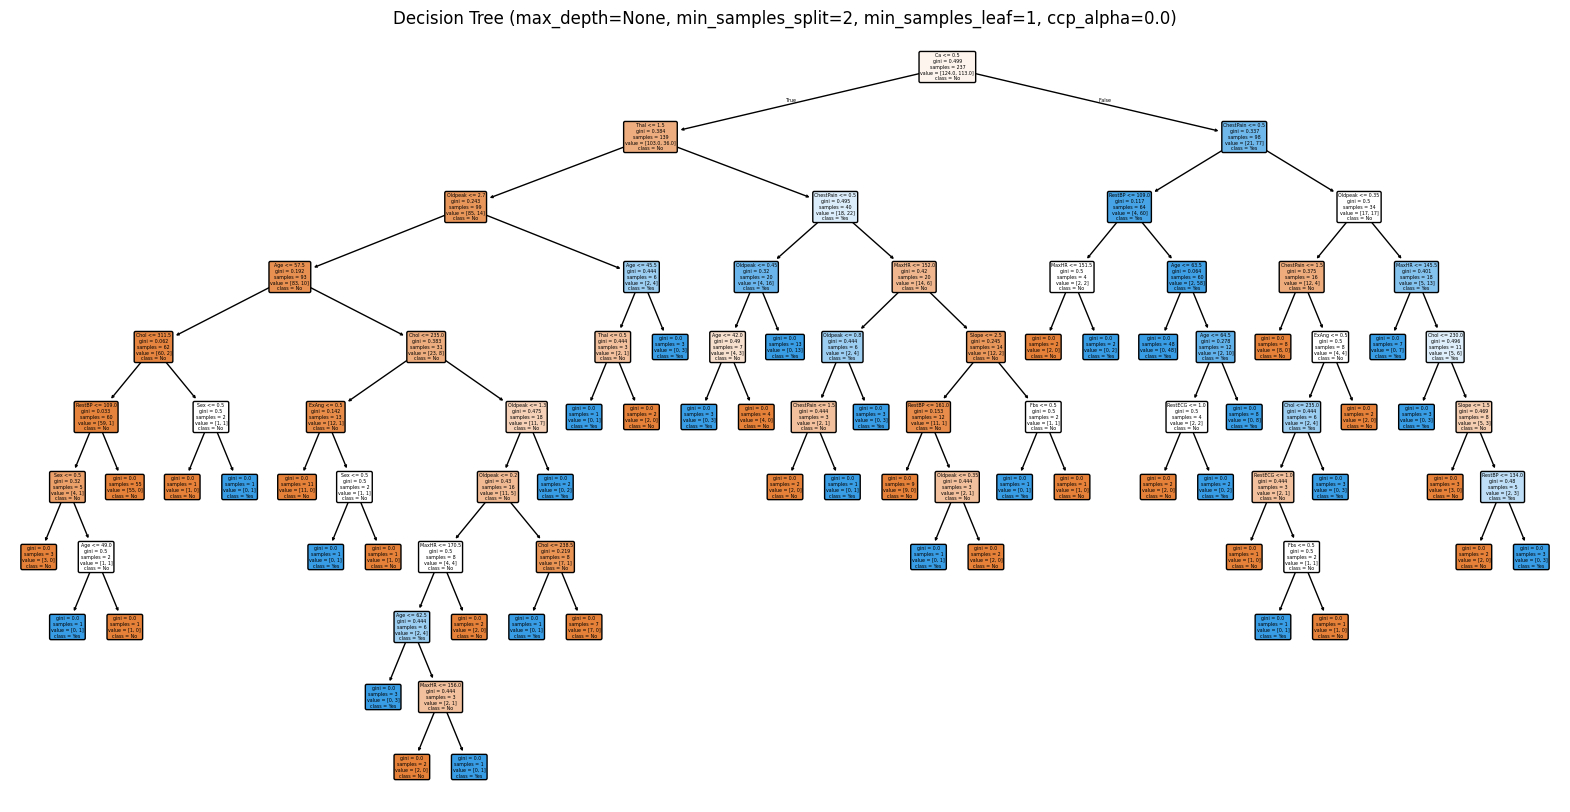

Tree Rules:
|--- Ca <= 0.50
|   |--- Thal <= 1.50
|   |   |--- Oldpeak <= 2.70
|   |   |   |--- Age <= 57.50
|   |   |   |   |--- Chol <= 311.50
|   |   |   |   |   |--- RestBP <= 109.00
|   |   |   |   |   |   |--- Sex <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Sex >  0.50
|   |   |   |   |   |   |   |--- Age <= 49.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  49.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- RestBP >  109.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Chol >  311.50
|   |   |   |   |   |--- Sex <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Sex >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  57.50
|   |   |   |   |--- Chol <= 235.00
|   |   |   |   |   |--- ExAng <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ExAng >  0.50
|   |   |   |   |   |   |--- Sex <= 0.50
|   |   |   |   

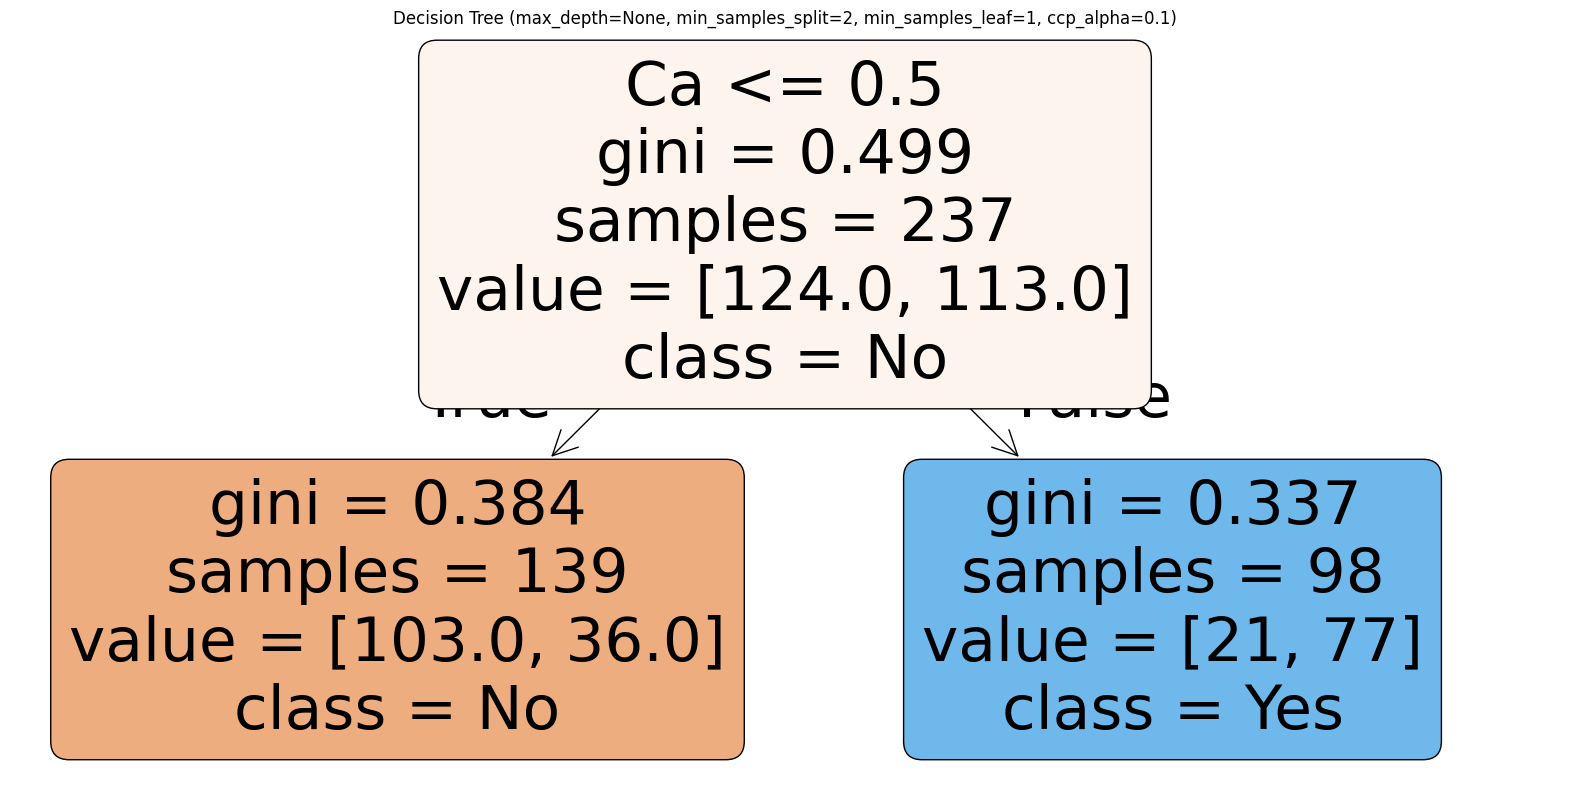

Tree Rules:
|--- Ca <= 0.50
|   |--- class: 0
|--- Ca >  0.50
|   |--- class: 1





In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# This was my last attempt at visualizing the tree structure with different parameter settings as I got the same 3 trees when I tried the first time
def train_and_visualize_tree(X_train, y_train, X, max_depth=None, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.0, random_state=42):
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha,
        random_state=random_state
    )
    clf.fit(X_train, y_train)
    
    print(f"Training DecisionTreeClassifier with parameters:")
    print(f"  max_depth = {max_depth}")
    print(f"  min_samples_split = {min_samples_split}")
    print(f"  min_samples_leaf = {min_samples_leaf}")
    print(f"  ccp_alpha = {ccp_alpha}")
    print(f"  Tree Depth = {clf.get_depth()}")
    print(f"  Number of Leaves = {clf.get_n_leaves()}\n")
    
    # Visualization
    plt.figure(figsize=(20, 10))
    plot_tree(
        clf,
        filled=True,
        feature_names=X.columns,
        class_names=['No', 'Yes'],
        rounded=True
    )
    plt.title(f"Decision Tree (max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, ccp_alpha={ccp_alpha})")
    plt.show()
    
    print("Tree Rules:")
    tree_rules = export_text(clf, feature_names=list(X.columns))
    print(tree_rules)
    print("\n" + "="*80 + "\n")

# Setting 1: Default parameters
train_and_visualize_tree(X_train, y_train, X)

# Setting 2: Limited max_depth
train_and_visualize_tree(X_train, y_train, X, max_depth=3)

# Setting 3: Increased min_samples_split and min_samples_leaf
train_and_visualize_tree(X_train, y_train, X, min_samples_split=10, min_samples_leaf=5)

# Setting 4: Increased ccp_alpha for pruning
train_and_visualize_tree(X_train, y_train, X, ccp_alpha=0.02)

# Setting 5: Extremely shallow tree
train_and_visualize_tree(X_train, y_train, X, max_depth=1)

# Setting 6: Extremely deep tree
train_and_visualize_tree(X_train, y_train, X, max_depth=None)

# Setting 7: Aggressively pruned tree
train_and_visualize_tree(X_train, y_train, X, ccp_alpha=0.1)

# Comment on the depth and the complexity on the tree

The observations I found are: 
 -increasing max depth makes the tree more complex
 -higher ccp_alpha prunes the tree aggressively which leads to a simpler model that may generalize better but at the cost of some tiny details
 -a higher min_samples_split prevents unnecessary splits which leads to generalization

# Discussion on the trade-off between bias and variance for each model.

Decision Tree Classifier:
bias-low,variance-high
decision trees are flexible and capable of captuiring complex patterns. Due to this they have low bias. decision trees are sensitive to training data and can overfit by capturing noise. a slight change can result in a totally different tree therefore high variance.

trade-off : high flexibility leads to overfitting and generalization is poor unless the tree is regularized

bagging:
bias-(low to moderate),variance-low
bagging uses multiple decision trees and each of trees retain the low bias of decision trees.
bagging has low variance as it averages the predictions from the multiple decision trees.
trade-off: combines multiple trees to reduce variance while retaining the low bias of decision trees.

boosting:
bias-low,variance-(moderate-high)
boosting reduces bias by training weak models and gives more weight to instances misclassified by the previous models.each subsequent tree address the errors of the prior ones which allows the ensemble to capture complex patterns.
boosting reduces bias but it increases variance iteratively. boosting might overfit if the number of iterations is too high.

trade-off: focuses on reducing bias but might overfit and increases variance if it is not properly tuned.

# Bagging Vs Boosting

My conclusion is that in this analysis, boosting classifiers consistently outperform bagging classifiers on the evaluation metrics and the fold counts. This remains true whether it is accuaracy, precison or when the the f1 score is taken into consideration. This is due to boosting's abilit}|y to effectively reduce bias by focusing on difficult to classify instances. Bagging improves the model by reducing variance and for this dataset it does not reach the same level of performance as boosting for this dataset.